#RBM

In [119]:
import os
import numpy as np
import pylab as pl
%pylab inline

from sklearn.metrics import mean_squared_error as mse 
from scipy import misc
from scipy.special import expit

Populating the interactive namespace from numpy and matplotlib


In [120]:
DATA_PATH = "../DataSets/big_alphabet_29x29/"

IMAGE_SIZE = (29, 29)
IMAGE_LENGTH = 29*29

In [204]:
def l2dist(y, pred):
    return np.sum((pred - y)**2, axis=1).reshape(pred.shape[0], 1)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [249]:
class RBM:
    def __init__(self, visible_size, hidden_size, n_steps=1000, k=1, learning_rate=0.1, batch_size=10, verbose=True, loss=l2dist):
        if k < 1:
            raise ValueError("k must be integer greater than 0")
        
        self.visible_size = visible_size
        self.hidden_size = hidden_size
        self.n_steps = n_steps
        self.k = k
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        self.verbose = verbose
        self.loss = loss
        
        self.w = np.random.normal(0, 0.01, (self.visible_size, self.hidden_size))
        self.a = np.random.normal(0, 0.01, self.visible_size)
        self.b = np.random.normal(0, 0.01, self.hidden_size)
        
    def fit(self, X):
        print X.shape
        errors = np.zeros(self.n_steps)
        for i in range(self.n_steps):
            #CD-k step
            #v, h = X[np.random.choice(X.shape[0], self.batch_size), ::], None
            v, h = X[np.random.choice(X.shape[0], self.batch_size), ::], None
            v_start, h_start = None, None
            for j in range(self.k):
                h = expit(np.dot(v, self.w) + self.b)
                if j == 0:
                    v_start, h_start = v, h
                if j != self.k - 1:
                    h = (np.random.uniform(0, 1, h.shape) < h).astype(float) 
                v = expit(np.dot(self.w, h.T).T + self.a)
            
            errors[i] = self.loss(v_start, self.predict(v_start)).mean()
            if self.verbose:
                print "Step %d, mse reconstruction %s" % (i, errors[i])
                
            #update step
            gradW = (np.dot(v_start.T, h_start) - np.dot(v.T, h)) / self.batch_size
            gradA = (v_start - v).mean(axis=0)
            gradB = (h_start - h).mean(axis=0)
            
            #print np.max(gradW), np.max(gradA), np.max(gradB) 
            
            self.w += self.learning_rate * gradW
            self.a += self.learning_rate * gradA
            self.b += self.learning_rate * gradB
            
        return errors
            
    def predict(self, sample):
        h = expit(np.dot(sample, self.w) + self.b)
        v = expit(np.dot(self.w, h.T).T + self.a)
        return v

In [250]:
data = list()

for pt in os.listdir(DATA_PATH):
    im = 1 - misc.imread(os.path.join(DATA_PATH, pt), flatten=True).flatten() / 255.0                   
    data.append(im)
    
data = np.array(data)

In [251]:
rbm = RBM(visible_size=DATA_LENGTH, hidden_size=DATA_LENGTH, k=3, n_steps=1000)

In [252]:
errors = rbm.fit(data)

(260, 841)
Step 0, mse reconstruction 209.424963095
Step 1, mse reconstruction 68.7133620302
Step 2, mse reconstruction 82.3187851627
Step 3, mse reconstruction 70.4652196117
Step 4, mse reconstruction 62.5125168789
Step 5, mse reconstruction 65.9969254011
Step 6, mse reconstruction 59.4370001176
Step 7, mse reconstruction 70.9751937422
Step 8, mse reconstruction 86.1185624661
Step 9, mse reconstruction 70.0083860058
Step 10, mse reconstruction 54.8227750426
Step 11, mse reconstruction 63.3706832565
Step 12, mse reconstruction 59.3862737455
Step 13, mse reconstruction 53.4962522095
Step 14, mse reconstruction 51.7978836821
Step 15, mse reconstruction 49.576827893
Step 16, mse reconstruction 56.8670089352
Step 17, mse reconstruction 52.5365707628
Step 18, mse reconstruction 53.3230594871
Step 19, mse reconstruction 54.9481514087
Step 20, mse reconstruction 51.6493955672
Step 21, mse reconstruction 43.7949032348
Step 22, mse reconstruction 51.6191968146
Step 23, mse reconstruction 47.269

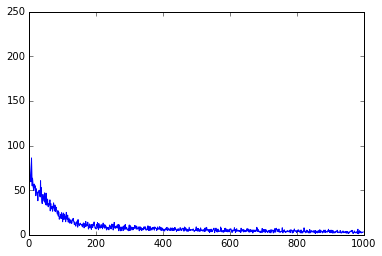

In [253]:
pl.plot(errors)

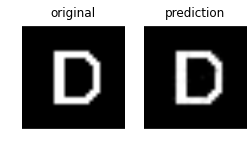

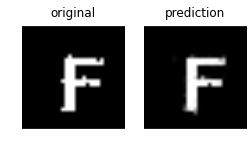

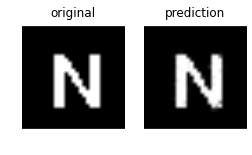

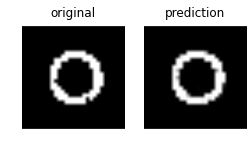

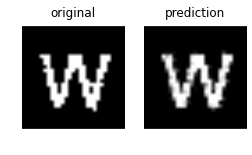

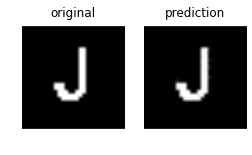

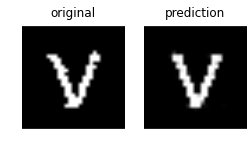

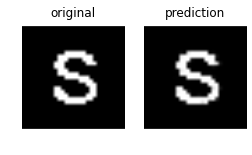

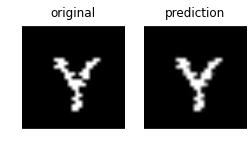

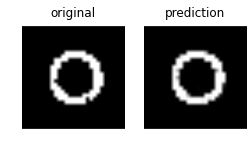

In [254]:
for i in range(10):
    sample = data[np.random.choice(data.shape[0]), ::]
    prediction = rbm.predict(sample)

    f, (ax1, ax2)  = pl.subplots(1, 2, sharex=True)
    f.set_size_inches(4, 2)
    ax1.imshow(sample.reshape(DATA_SIZE), cmap="gray")
    ax1.set_title("original")
    ax1.axis('off')
    ax2.imshow(prediction.reshape(DATA_SIZE), cmap="gray")
    ax2.set_title("prediction")
    ax2.axis('off')
    pl.show()